# Introduction

---

---
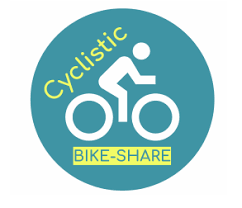







For this case study, I pretend as the role of a junior data analyst working in the marketing and analytics team at Cyclistic, a bike-share company in Chicago.

The director of marketing believes that the company’s future success depends on maximizing the number of member riders. Therefore, my team is tasked to suggest marketing strategies to convert casual riders into member riders. However, we need to first understand:


1. How casual and member riders differ ?
2. Why casual riders would buy a membership ?
3. How digital media could affect their marketing tactics ?


I was specifically assigned to solve the first problem.
To accomplish my task, I will follow the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.

# Ask Phase

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Cyclistic offers three pricing plans:

*   single-ride passes
*   full-day passes
*   annual memberships

Purchase the first two are called casual riders, and the rest are considered member riders.

Casual and member riders need to be analyzed how differ in terms of using Cyclistic bikes. This will involve exploring the following specific points;

* Proportion of casual and member riders,
* Number of rides by bike type,
* Frequency of rides by month (season),
* Frequency of rides by day of the week,
* Frequency of rides by hour within a day,
* Average ride duration by day of the week.

Then, the recommendations for Cyclistic's marketing strategy will be presented.

# Prepare Phase

Note : If you want also try the notebook, you should upload your dataset to your google drive because google colab interface allows you to do that much better.

The data has suplied for using analyzing include dates from july 2022 to june 2023. Access the dataset through this [link](https://divvy-tripdata.s3.amazonaws.com/index.html).
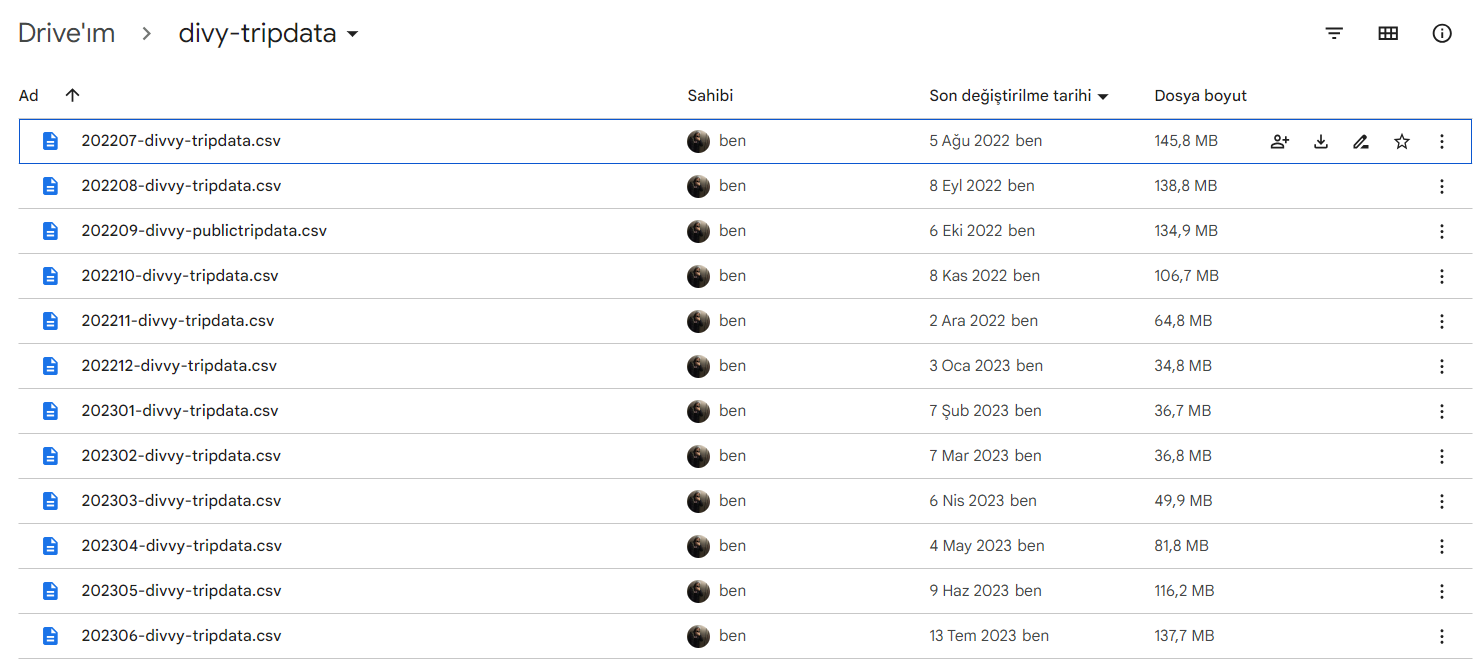

Total data is approximately 1GB size.

The data has been examined and here is the description of the attributes of the columns.
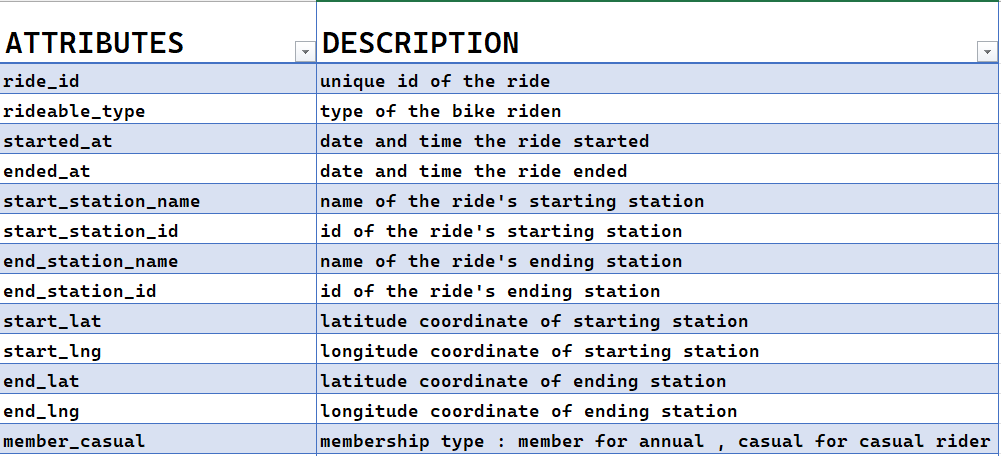

# Process Phase

How casual and member riders differ ? There are 12 seperated data for each month. So, the total usage of bikes should be different.

In [1]:
# Importing Data Science Libraries
import numpy as np
import pandas as pd
import os

# Importing Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import missingno as msno
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Set the directory you want to start from
rootDir = '/content/drive/MyDrive/divy-tripdata'

dataframes = []  # List to store all dataframes

# Getting all the directories
all_dirs = os.listdir(rootDir)
all_dirs.sort(reverse=True)# Sorting directories in descending order

# Looping only through the csv files which they should be last 12 months.
for dirName in all_dirs:
      if dirName.endswith('.csv'):  # to ensure we're working with CSVs
          filepath = os.path.join(rootDir, dirName)
          df = pd.read_csv(filepath)
          dataframes.append(df)

In [4]:
# Check row size of dfs' whether merged_df is correct or not
for df in dataframes:
  print(df[df.columns[0]].count())

719618
604827
426590
258678
190445
190301
181806
337735
558685
701339
785932
823488


In [5]:
# Now that we have all dataframes in a list, we can concatenate them.
merged_df = pd.concat(dataframes, ignore_index=True)


In [6]:
# To check the combined data
merged_df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,NaN,NaN,NaN,NaN,41.91,-87.69,41.91,-87.70,member
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,NaN,NaN,NaN,NaN,41.94,-87.65,41.94,-87.65,member
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,NaN,NaN,NaN,NaN,41.95,-87.68,41.92,-87.63,member
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,NaN,NaN,NaN,NaN,41.99,-87.65,41.98,-87.66,member
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,NaN,NaN,NaN,NaN,41.98,-87.66,41.99,-87.65,member


In [7]:
# Define a function to ensure irrevelant columns we dont need in future
def drop_columns(df, cols_to_drop):
    df = df.drop(cols_to_drop, axis=1)
    return df

# Drop 'start_station_id' and 'end_station_id'
cols_to_drop = ['start_station_id', 'end_station_id']
merged_df = drop_columns(merged_df, cols_to_drop)


Looking at the data, it seems like started_at and ended_at should be datetime objects, also should be removed duplicated entries within the data.

In [8]:
def preprocess_data(df):
    # Convert 'started_at' and 'ended_at' to datetime
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])

    # Convert 'start_station_id' and 'end_station_id' to string
    df['start_station_name'] = df['start_station_name'].astype(str)
    df['end_station_name'] = df['end_station_name'].astype(str)
    df['rideable_type'] = df['rideable_type'].astype(str)

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Return the processed dataframe
    return df

# Use the function on your data
merged_df = preprocess_data(merged_df)

In [9]:
print(merged_df.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object




GETTING MEANINGFULL INSIGHTS WITH CURRENT DATA

To examine patterns and relationships in our data, we'll be creating new attributes from our existing rows. By breaking down our date/time data into more granular features such as hour of the day, day of the week, and month, we can potentially discover new insights related to the timing of bike rides.



In [10]:
def ride_length(df):
  df['ride_length'] = (df['ended_at'] - df['started_at'])/pd.Timedelta(minutes=1)
  df['ride_length'] = df['ride_length'].astype('int32')
  return df

merged_df = ride_length(merged_df)

In [11]:
merged_df.sort_values('ride_length')


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
3886480,E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,nan,41.780576,-87.585171,41.780000,-87.590000,member,-10353
3064251,918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,Wilton Ave & Diversey Pkwy*,41.932418,-87.652705,41.932418,-87.652705,member,-168
367827,8B6E5BA70093AAB7,electric_bike,2023-06-02 19:29:06,2023-06-02 18:28:51,nan,Calumet Ave & 18th St,41.860000,-87.620000,41.857618,-87.619411,casual,-60
2818909,B5602D5BB3D517F6,electric_bike,2022-11-06 01:59:05,2022-11-06 01:02:03,Western Ave & Winnebago Ave,California Ave & Milwaukee Ave,41.915592,-87.687070,41.922695,-87.697153,member,-57
2746990,1BA46F9F216F5E17,electric_bike,2022-11-06 01:58:11,2022-11-06 01:00:12,Pine Grove Ave & Waveland Ave,Broadway & Cornelia Ave,41.949382,-87.646576,41.945529,-87.646439,casual,-57
...,...,...,...,...,...,...,...,...,...,...,...,...
2272246,307CA01BAE3CC7E3,docked_bike,2023-01-08 11:08:52,2023-01-31 19:12:36,Michigan Ave & 8th St,nan,41.872773,-87.623981,NaN,NaN,casual,33603
5583039,A256444CE831A7EE,docked_bike,2022-07-09 01:02:45,2022-08-01 18:51:57,Ashland Ave & 74th St,nan,41.759236,-87.663474,NaN,NaN,casual,34189
5582583,3BFD0599F253B024,docked_bike,2022-07-09 01:03:19,2022-08-01 19:11:26,Ashland Ave & 74th St,nan,41.759236,-87.663474,NaN,NaN,casual,34208
5582761,70835A30C542BA2E,docked_bike,2022-07-09 01:02:46,2022-08-01 19:11:35,Ashland Ave & 74th St,nan,41.759236,-87.663474,NaN,NaN,casual,34208


In [12]:
merged_df[merged_df['ride_length'] < 0].count()

ride_id               68
rideable_type         68
started_at            68
ended_at              68
start_station_name    68
end_station_name      68
start_lat             68
start_lng             68
end_lat               68
end_lng               68
member_casual         68
ride_length           68
dtype: int64

In [13]:
merged_df[merged_df['ride_length'] < 1].count()

ride_id               149372
rideable_type         149372
started_at            149372
ended_at              149372
start_station_name    149372
end_station_name      149372
start_lat             149372
start_lng             149372
end_lat               149369
end_lng               149369
member_casual         149372
ride_length           149372
dtype: int64

This code blocks show that there are some mistaken records with wrong end date and start date. This occurs to negative ride lenght values. So they should be removed.

In [14]:
def fix_ride_length(df):
  df = df[df['ride_length'] >= 1]
  df = df.reset_index()
  df = df.drop(columns=['index'])
  return df
merged_df = fix_ride_length(merged_df)

In [15]:
merged_df[merged_df['ride_length'] < 1].count()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
dtype: int64

Looks like it got fixed.

In [16]:
merged_df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                    int32
dtype: object

In [17]:
df = merged_df

In [18]:
df['year'] = df['started_at'].dt.year

In [19]:
df['month'] = df['started_at'].dt.month_name()

In [20]:
from calendar import month_name

# Take the months name from the module named calender
months = list(month_name)[1:]  # [1:] is for ignoring a whitespace at start

cat_type = pd.CategoricalDtype(categories=months, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [21]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [22]:
from calendar import day_name

# Take the months name from the module named calender
days = list(day_name)[:]  # [1:] is for ignoring a whitespace at start

cat_type = pd.CategoricalDtype(categories=days, ordered=True)
df['day_of_week'] = df['day_of_week'].astype(cat_type)

In [23]:
df['hour'] = df['started_at'].dt.hour

In [24]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,year,month,day_of_week,hour
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,nan,nan,41.91,-87.69,41.91,-87.70,member,57,2023,June,Monday,13
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,nan,nan,41.94,-87.65,41.94,-87.65,member,2,2023,June,Monday,1
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,nan,nan,41.95,-87.68,41.92,-87.63,member,16,2023,June,Tuesday,18
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,nan,nan,41.99,-87.65,41.98,-87.66,member,4,2023,June,Monday,14
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,nan,nan,41.98,-87.66,41.99,-87.65,member,3,2023,June,Monday,15


# Analyze-Share Phases

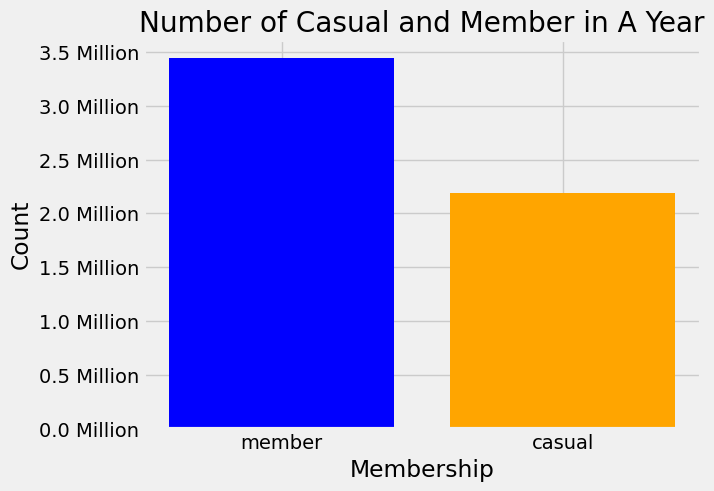

In [25]:
from matplotlib.ticker import FuncFormatter
# Use value_counts() to count the occurrences of each value in the 'membership' column
value_counts = df['member_casual'].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color={'blue','orange'})

# Add labels and title
plt.xlabel('Membership')
plt.ylabel('Count')
plt.title('Number of Casual and Member in A Year')

def millions_formatter(x, pos):
    return f'{x/1e6:.1f} Million'

# Apply the custom formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

This plot shows the total records of casual and member riders in a year.

In [26]:
fig_2 = df.groupby(['year', 'month', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_2, x = 'month', y = 'ride_id', range_y = [0,450000],
        color = 'member_casual',
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'month': 'Months (Oct 2020 - Sep 2021)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': True, 'ride_id': True},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})





*   It shows that the total number of rides fall during winter season and rise during summer season.
*   The behaviour of casual riders and members tend to be the same as the season changes.
*   Maximum riders are using bikes in summer season.
*   Casual riders nearly overtake the overtake members during june and july.



In [27]:
fig_3 = df.groupby(['day_of_week', 'member_casual'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_id'] != 0]

px.line(fig_3, x = 'day_of_week', y = 'ride_id', range_y = [0,700000],
        color = 'member_casual',
        line_shape = 'spline',
        markers=True,
        labels = {'ride_id': 'No. of Rides', 'day_of_week': 'Weekdays', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* Here it shows more casual riders are using bike share on Weekends (ie., Saturdays and Sundays).
* But there are a fixed number of casual riders using on Weekdays, might be commuting.
* While the number of members riding tend to be same almost daily.
* The number of casual riders slightly overpassed the member riders on weekends.

In [29]:
fig_4 = df.groupby(['hour', 'member_casual'], as_index=False).count()

fig_4a = px.line(fig_4, x = 'hour', y = 'ride_id', range_x = [0,23], range_y = [0,500000],
                 color = 'member_casual',
                 line_shape = 'spline',
                 markers=True,
                 labels = {'ride_id': 'No. of Rides', 'hour': '24 Hours', 'member_casual': 'Member/Casual'},
                 hover_name = 'member_casual', hover_data = {'member_casual': False, 'month': False, 'ride_id': True},
                 color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
fig_4a.update_xaxes(dtick=1)
fig_4a.show()

* In a day, casual riders and members use bike share more during afternoon, peak use during evening.
* While in the morning time, the number of casual riders are way less than the members.
* This might be because of member riders are paying annual to routine rides for their work/school etc. jobs.

In [30]:
fig_4 = round(df.groupby('member_casual', as_index=False).mean(),2)

px.bar(fig_4, y = 'member_casual', x = 'ride_length', range_x = [0,35],
        color = 'member_casual',
        height = 300,
        text = 'ride_length',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

Casual rides almost multiplied two and half times than member rides.

In [31]:
fig_5 = round(df.groupby(['year', 'month', 'member_casual'], as_index=False).mean(),2).dropna()

px.bar(fig_5, x = 'month', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'month': 'Months (Oct 2020 - Sep 2021)'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* Average ride length of casual riders are more than twice than members in all months.
* There are slightly increasing over the summer season of casual riders.

In [32]:
fig_6 = round(df.groupby(['day_of_week', 'member_casual'], as_index=False).mean(),2)

px.bar(fig_6, x = 'day_of_week', y = 'ride_length',
        color = 'member_casual',
        barmode='group',
        text = 'ride_length',
        labels = {'ride_length': 'Average Ride Length (minutes)', 'member_casual': 'Member/Casual', 'day_of_week': 'Weekdays'},
        hover_name = 'member_casual', hover_data = {'member_casual': False, 'ride_length': True},
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* There is huge differences between those casual and member riders that takes on weekend.
* Also casual riders choose to prefer weekends for riding.

# Act Phase

## Conclusion

* Annual members and Casual riders use Cyclistic bike share differently.

* The average ride length of causual riders are more than twice as of members.

* From the average ride length difference, we can conclude that Annual members usually use bike share for daily commuting, while casual riders mostly use bike share for leisure rides mostly during Weekends.

* But there are a fixed number of casual riders who use bike share for commuting.

## Recommendation

* Current Weekend casual riders will be interested in a new Annual Membership package that is only for Weekend use.

* It is urgent to launch promotions for current Weekday casual riders. These promotions should highlight the money they can save by becoming members instead of buying single passes or full day passes for a year.

* A way to reward casual riders is to offer a Loyalty Program, where they can get occasional discounts on membership fees if they have high loyalty points.